p_up: 0.17455821808860095, p_mid: 0.6467796994705531, p_down: 0.17866208244084592
p_up: 0.18915833890454037, p_mid: 0.6466113671236555, p_down: 0.1642302939718041
p_up: 0.204227888175564, p_mid: 0.6448183948237832, p_down: 0.15095371700065277
p_up: 0.21971953561151486, p_mid: 0.6415120548061353, p_down: 0.1387684095823498
p_up: 0.2355886978049903, p_mid: 0.6367977049513309, p_down: 0.12761359724367885
p_up: 0.25179339976732673, p_mid: 0.6307750771462124, p_down: 0.11743152308646083
p_up: 0.2682941430626554, p_mid: 0.6235385521056885, p_down: 0.108167304831656
p_up: 0.2850537802420614, p_mid: 0.6151774212625862, p_down: 0.09976879849535232
p_up: 0.3020373952778009, p_mid: 0.6057761363370655, p_down: 0.09218646838513359
p_up: 0.31921218972449683, p_mid: 0.595414547142352, p_down: 0.08537326313315122
p_up: 0.33654737433390464, p_mid: 0.5841681281837345, p_down: 0.07928449748236076
p_up: 0.3540140658744847, p_mid: 0.5721081945585926, p_down: 0.07387773956692265
p_up: 0.3715851889119375, p_

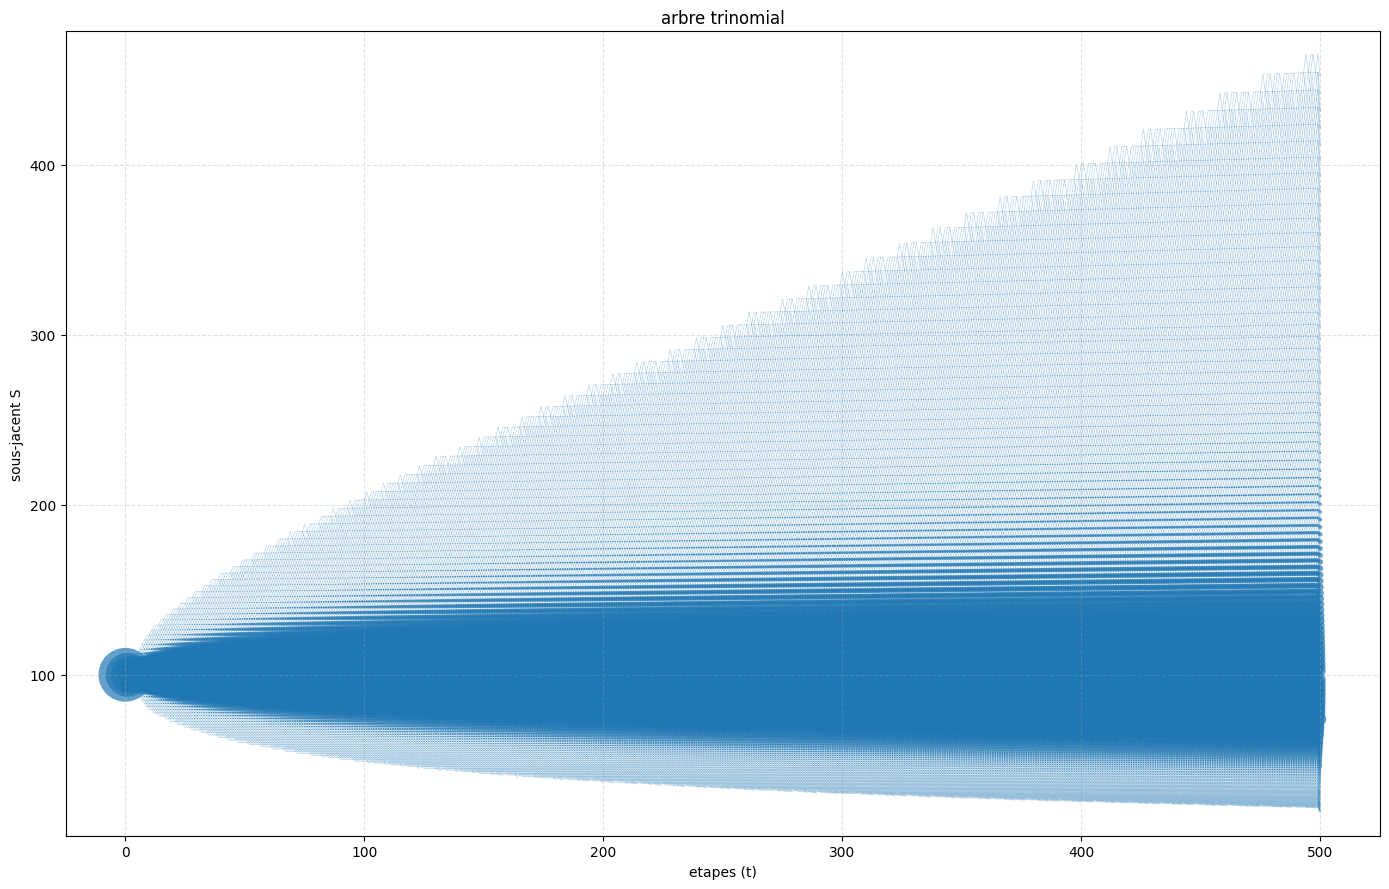

In [ ]:
from pricing import BlackScholesPricer, TrinomialTree, Market, Option
from pricing.convergence import *
import datetime as dt
import sys
# limite de récursion modifée
sys.setrecursionlimit(100000)

# parametrage de l'arbre
market = Market(S0=100, r=0.05, sigma=0.3, dividend=3, dividend_date=dt.date(2026, 10, 23) - dt.timedelta(days=200))
option = Option(K=102, option_type="call", maturity=dt.date(2026, 10, 23), option_class="european")
tree = TrinomialTree(market, N=600, pruning=True, epsilon=1e-7, pricingDate=dt.date(2026, 10, 23) - dt.timedelta(days=200))

# prix de l'arbre
price = tree.price(option, compute_greeks=False, activate_timer=True)
print("Prix de l’option:", price)

# black Scholes
bs = BlackScholesPricer(S=market.S0, K=option.K, T=tree.delta_t * tree.N, r=market.r, sigma=market.sigma, option_type='call', dividend=market.dividend, dividend_date = market.dividend_date)
bs_price = bs.price()
print("Black-Scholes Price: {:.4f}".format(bs_price))

# graphique de l'arbre
tree.plot_tree(tree.N)

p_up: 0.17574775699934864, p_mid: 0.6457229871992975, p_down: 0.17852925580135384
p_up: 0.17574676431131245, p_mid: 0.6457249882862992, p_down: 0.17852824740238835
p_up: 0.19131508709198222, p_mid: 0.6452654159271123, p_down: 0.16341949698090547
p_up: 0.20755311202897492, p_mid: 0.642974050234355, p_down: 0.14947283773667003
p_up: 0.1608883079351113, p_mid: 0.6442641780287162, p_down: 0.19484751403617256
p_up: 0.14678146111963986, p_mid: 0.6407910923859216, p_down: 0.21242744649443857
p_up: 0.175745275463295, p_mid: 0.6457279895458153, p_down: 0.17852673499088964
p_up: 0.19131133387488075, p_mid: 0.645268614993683, p_down: 0.16342005113143623
p_up: 0.20754687209423384, p_mid: 0.6429779633587015, p_down: 0.14947516454706464
p_up: 0.2244132629007639, p_mid: 0.6389414056830774, p_down: 0.13664533141615864
p_up: 0.24187335265257148, p_mid: 0.6332412255972418, p_down: 0.12488542175018673
p_up: 0.25989141138277094, p_mid: 0.6259567217389523, p_down: 0.11415186687827676
p_up: 0.16088884924367

<Axes: >

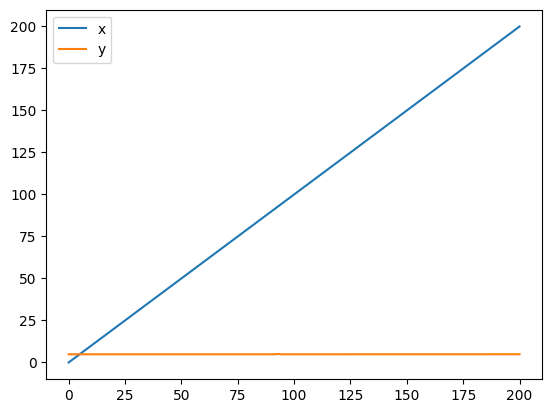

In [ ]:
x=[]
y=[]
for i in range(0, 201):
    # parametrage de l'arbre
    market = Market(S0=100, r=0.05, sigma=0.3, dividend=3, dividend_date=dt.date.today() + dt.timedelta(days=i))
    option = Option(K=110, option_type="call", maturity=dt.date.today() + dt.timedelta(days=200), option_class="european")
    tree = TrinomialTree(market, N=600, pruning=True, epsilon=1e-7, pricingDate=dt.date.today())

    # prix de l'arbre
    y.append(tree.price(option, compute_greeks=False, activate_timer=False))
    x.append(i)

import pandas as pd
pd.DataFrame({
    'y': y
}).plot()

In [ ]:
PETITE FONCTION
ARCHITECTURE TYPE COMPTE EPARGN ETC (savoir architecturer)
PARTIE QCM

# Graphique de Convergence et d'Erreur

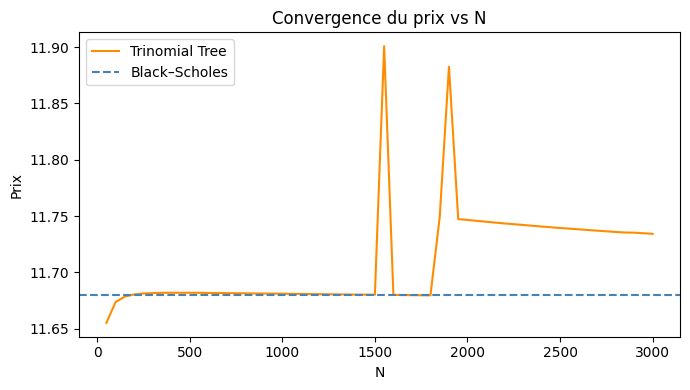

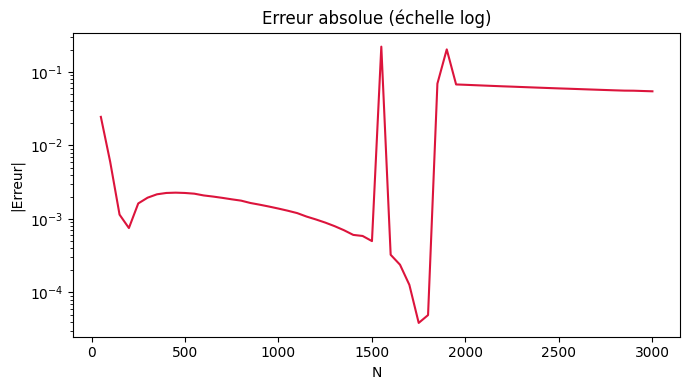

In [ ]:
bs_convergence_by_strike(market, option, strikes=range(80, 161, 3), n_steps=1000)
bs_convergence_by_step(market, option, max_n=1000, step=50)

# Grecques - Arbre Trinomial

In [ ]:
print(f"Delta : {tree.delta():.6f}")
print(f"Gamma : {tree.gamma():.6f}")
print(f"Vega  : {tree.vega(option):.6f}")   # déjà par 1% de vol
print(f"Vanna : {tree.vanna(option):.6f}")  # déjà par 1% de vol
print(f"Rho   : {tree.rho(option):.6f}")    # déjà par 1% de taux

RuntimeError: Activez compute_greeks dans price().

# Grecques - Black-Scholes

In [ ]:
bs.greeks()

{'delta': 0.4134466041141795,
 'gamma': 0.019265804746051423,
 'theta': -0.013510812713292021,
 'vega': 0.3937613791932702,
 'rho': 0.36730645004174056,
 'vanna': 0.00819673312412271}

In [ ]:
# soutenance sur teams de 30 min
# 2 quizz jusqu'à 17h le 29/10 : un qualitatif -> questions et un quantitatif où on va 
# devoir utiliser notre code pour répondre (possible de faire un ajout de code aussi)
# exemple qualitatif : quelle est le plus gros reproche de l'abre trinomial
# le qualitatif c'est 20 questions en 20 minutes sans retour parfois choix multiples (plus qu'une réponse 
# à chaque questions à choix multiples)
# les calculs sont que des calculs faisables de test
# le qcm quantitatif n'est pas limité dans le temps (pricing d'options, du delta hedge, calcul de vega)
# toujours saisi sans retour

delta: prix_option en S0+epsilon (dans le temps) + prix_option en S0-epsilon/ 2*epsilon
c'est au QCM ça.
Les risk managers font des delta en pourcentage de la valeur du produit pour avoir des calls en % pour pouvoir comparer des produits similaires. Le epsilon est par exemple 1% de la valeur du produit. epsilon = 0.4 pour un produit à 40 et 4 pour un produit à 400 (décalage d'1%)
Il faudra utiliser la première méthode pour le QCM.

Gamma: dérivé du delta donc --> delta+ - delta- si unité de 1 de décalage
Avec un epsilon : (delta+(de epsilon) - delta-)/epsilon
à partir du prix = (Prixoption(S0 + epsilon) + Prixoption(S0-epsilon) - 2*Prixoption(S0)) / epsilon^2

Vega : (dérivé du prix par sigma) * 1%
 = (PrixS0 + 1% - PrixS0 - 1%)/2 car c'est de la vol

vega = dérivé seconde par rapport à la vol

vanna = dérivé croisée = dérivé du vega par rapport au spot = dérivée du delta par rapport à la vol


dérivée dans le code:
le callable est une fonction qui doit prendre un float en argument (valeur par rapport à laquelle on dérive)
shift = amplituyde de la variation

In [ ]:
# partir de la fin de l'arbre et casser les liens en les mettant = None
# , pas oublier de casser les liens du noeud vers l'arbre
# ça c'est pour VBA (avec compteur du nombre de noeud).
# pour python pareil